<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_13_Regression_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [ ]:
! pip install regressormetricgraphplot

In [ ]:
data = pd.read_csv("Behavior of the urban traffic.csv")
data.head()

,id,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,1,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,2,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,3,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,4,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,5,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [ ]:
data = pd.get_dummies(data,columns=['Hour'],drop_first=True)
data.head()

,id,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Hour_10:30,Hour_11:00,Hour_11:30,Hour_12:00,Hour_12:30,Hour_13:00,Hour_13:30,Hour_14:00,Hour_14:30,Hour_15:00,Hour_15:30,Hour_16:00,Hour_16:30,Hour_17:00,Hour_17:30,Hour_18:00,Hour_18:30,Hour_19:00,Hour_19:30,Hour_20:00,Hour_7:00,Hour_7:30,Hour_8:00,Hour_8:30,Hour_9:00,Hour_9:30
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     135 non-null    int64  
 1   Immobilized_bus                        135 non-null    float64
 2   Broken_Truck                           135 non-null    float64
 3   Vehicle_excess                         135 non-null    float64
 4   Accident_victim                        135 non-null    float64
 5   Running_over                           135 non-null    float64
 6   Fire_vehicles                          135 non-null    float64
 7   Occurrence_involving_freight           135 non-null    float64
 8   Incident_involving_dangerous_freight   135 non-null    float64
 9   Lack_of_electricity                    135 non-null    float64
 10  Fire                                   135 non-null    float64
 11  Point_

In [ ]:
X=data.drop(['Slowness_in_traffic_percent','id'],axis=1).values
y=data['Slowness_in_traffic_percent'].values

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(135, 42)
y: Type-<class 'numpy.ndarray'>, Shape-(135,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (108, 42) , y_train: (108,)
X_test: (27, 42) , y_test: (27,)


## **Linear regression**

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

### **Testing , evaluation metrics**

In [ ]:
mse = np.mean( (y - model.predict(X))**2 )
print("MSE:",mse)

print("----------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ",mae)

print("----------------------------------------------")

MAE = median_absolute_error(y_test, y_pred)
print("Median absolute error: ",MAE)

print("----------------------------------------------")

msle = mean_squared_log_error(y_test, y_pred)
print("Mean squared logarithmic error: ",msle)

print("----------------------------------------------")

me = max_error(y_test, y_pred)
print("Max error: ",me)

print("----------------------------------------------")

vscore= explained_variance_score(y_test, y_pred)
print("Explained variance score: ",vscore)

print("----------------------------------------------")

rscore = r2_score(y_test, y_pred)
print("r2 score: ",rscore)

MSE: 5.091807078854171
----------------------------------------------
Mean absolute error:  2.809458545067806
----------------------------------------------
Median absolute error:  2.166830171051224
----------------------------------------------
Mean squared logarithmic error:  0.10101311810989103
----------------------------------------------
Max error:  7.963189885259467
----------------------------------------------
Explained variance score:  0.24871772877689335
----------------------------------------------
r2 score:  0.23530838731669124


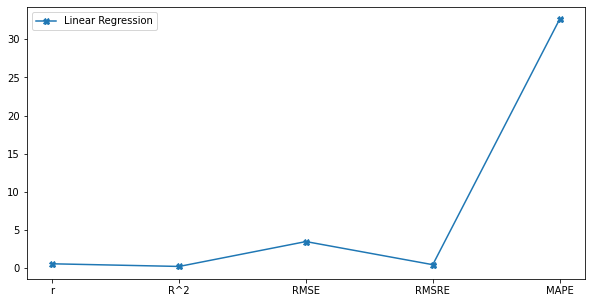

In [ ]:
from regressormetricgraphplot import CompareModels

plot = CompareModels()
x = plot.add(model_name='Linear Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

## **Polynomial Regression (various degrees can be checked although more is the degree, more is the probability of overfitting, So degree 2 and 3 can work better)**

In [ ]:
polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg.fit(X,y)
y_pred=polyreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

print("----------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ",mae)

print("----------------------------------------------")

MAE = median_absolute_error(y_test, y_pred)
print("Median absolute error: ",MAE)

print("----------------------------------------------")

msle = mean_squared_log_error(y_test, y_pred)
print("Mean squared logarithmic error: ",msle)

print("----------------------------------------------")

me = max_error(y_test, y_pred)
print("Max error: ",me)

print("----------------------------------------------")

vscore= explained_variance_score(y_test, y_pred)
print("Explained variance score: ",vscore)

print("----------------------------------------------")

rscore = r2_score(y_test, y_pred)
print("r2 score: ",rscore)

MSE: 0.5616738429334432
----------------------------------------------
Mean absolute error:  0.19515064380787053
----------------------------------------------
Median absolute error:  0.0034301757812498224
----------------------------------------------
Mean squared logarithmic error:  0.002982273165778329
----------------------------------------------
Max error:  3.5511596679687507
----------------------------------------------
Explained variance score:  0.967144236753845
----------------------------------------------
r2 score:  0.9648275971266226


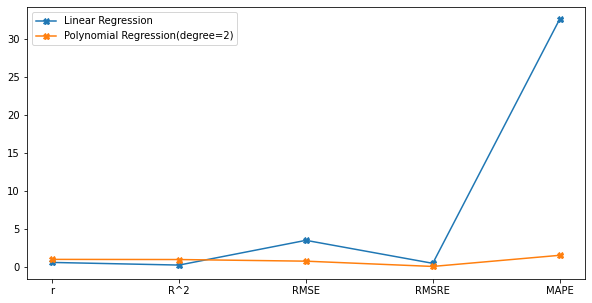

In [ ]:
x = plot.add('Polynomial Regression(degree=2)',y_test,y_pred)
plot.show(figsize=(10, 5))

## **Playing with Model, the following are the options -:**

**(1) Encoding of features**

**(2) removal of some features**

**(3) normalization methods**

**(4)  Shuffling of training samples**

**(5) Degree of polynomials (such as 2, 3, 4 etc print parameters of the polynomial models)**

In [ ]:
X=data.drop(['Slowness_in_traffic_percent','id','Lack_of_electricity','Fire','Semaphore_off'],axis=1).values  
Y=data['Slowness_in_traffic_percent'].values

**removed 3 features, and error has increased significantly as you will see**

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(135, 39)
y: Type-<class 'numpy.ndarray'>, Shape-(135,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (108, 39) , y_train: (108,)
X_test: (27, 39) , y_test: (27,)


In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = np.mean( (y - model.predict(X))**2 )
print("MSE:",mse)

print("----------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ",mae)

print("----------------------------------------------")

MAE = median_absolute_error(y_test, y_pred)
print("Median absolute error: ",MAE)

print("----------------------------------------------")

msle = mean_squared_log_error(y_test, y_pred)
print("Mean squared logarithmic error: ",msle)

print("----------------------------------------------")

me = max_error(y_test, y_pred)
print("Max error: ",me)

print("----------------------------------------------")

vscore= explained_variance_score(y_test, y_pred)
print("Explained variance score: ",vscore)

print("----------------------------------------------")

rscore = r2_score(y_test, y_pred)
print("r2 score: ",rscore)

MSE: 5.525011807471965
----------------------------------------------
Mean absolute error:  2.886998719474469
----------------------------------------------
Median absolute error:  3.0414094805100973
----------------------------------------------
Mean squared logarithmic error:  0.10358065508478008
----------------------------------------------
Max error:  7.913861259607538
----------------------------------------------
Explained variance score:  0.22090715691163987
----------------------------------------------
r2 score:  0.19895007370330564


**Normalization method now**

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(data, axis=1)
names = data.columns
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,id,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Hour_10:30,Hour_11:00,Hour_11:30,Hour_12:00,Hour_12:30,Hour_13:00,Hour_13:30,Hour_14:00,Hour_14:30,Hour_15:00,Hour_15:30,Hour_16:00,Hour_16:30,Hour_17:00,Hour_17:30,Hour_18:00,Hour_18:30,Hour_19:00,Hour_19:30,Hour_20:00,Hour_7:00,Hour_7:30,Hour_8:00,Hour_8:30,Hour_9:00,Hour_9:30
0,0.230571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.945343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230571,0.000000,0.000000,0.00000,0.000000,0.0
1,0.287006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.143503,0.000000,0.00000,0.000000,0.0
2,0.324083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.939841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.108028,0.00000,0.000000,0.0
3,0.396760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.912548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.09919,0.000000,0.0
4,0.409328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.081866,0.0


In [ ]:
X=data.drop(['Slowness_in_traffic_percent','id'],axis=1).values
y=data['Slowness_in_traffic_percent'].values

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(135, 42)
y: Type-<class 'numpy.ndarray'>, Shape-(135,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (108, 42) , y_train: (108,)
X_test: (27, 42) , y_test: (27,)


In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = np.mean( (y - model.predict(X))**2 )
print("MSE:",mse)

print("----------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ",mae)

print("----------------------------------------------")

MAE = median_absolute_error(y_test, y_pred)
print("Median absolute error: ",MAE)

print("----------------------------------------------")

msle = mean_squared_log_error(y_test, y_pred)
print("Mean squared logarithmic error: ",msle)

print("----------------------------------------------")

me = max_error(y_test, y_pred)
print("Max error: ",me)

print("----------------------------------------------")

vscore= explained_variance_score(y_test, y_pred)
print("Explained variance score: ",vscore)

print("----------------------------------------------")

rscore = r2_score(y_test, y_pred)
print("r2 score: ",rscore)

MSE: 5.091807078854171
----------------------------------------------
Mean absolute error:  2.809458545067806
----------------------------------------------
Median absolute error:  2.166830171051224
----------------------------------------------
Mean squared logarithmic error:  0.10101311810989103
----------------------------------------------
Max error:  7.963189885259467
----------------------------------------------
Explained variance score:  0.24871772877689335
----------------------------------------------
r2 score:  0.23530838731669124


**Shuffling of training Samples**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (108, 42) , y_train: (108,)
X_test: (27, 42) , y_test: (27,)


In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = np.mean( (y - model.predict(X))**2 )
print("MSE:",mse)

print("----------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ",mae)

print("----------------------------------------------")

MAE = median_absolute_error(y_test, y_pred)
print("Median absolute error: ",MAE)

print("----------------------------------------------")

msle = mean_squared_log_error(y_test, y_pred)
print("Mean squared logarithmic error: ",msle)

print("----------------------------------------------")

me = max_error(y_test, y_pred)
print("Max error: ",me)

print("----------------------------------------------")

vscore= explained_variance_score(y_test, y_pred)
print("Explained variance score: ",vscore)

print("----------------------------------------------")

rscore = r2_score(y_test, y_pred)
print("r2 score: ",rscore)

MSE: 4.924662583437977
----------------------------------------------
Mean absolute error:  2.3079184700780275
----------------------------------------------
Median absolute error:  1.573451382673575
----------------------------------------------
Mean squared logarithmic error:  0.06805281413255128
----------------------------------------------
Max error:  9.5356867724017
----------------------------------------------
Explained variance score:  0.5030858894489112
----------------------------------------------
r2 score:  0.4831851264723166


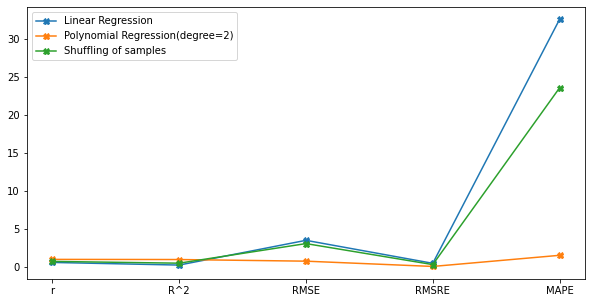

In [ ]:
x = plot.add('Shuffling of samples',y_test,y_pred)
plot.show(figsize=(10, 5))

MSE, Mean absolute error and Median absolute error has reduced after shuffling

**Polynomial regression (exploring degree 3,6)**

In [ ]:
degree1 = 3
degree2 = 6

polyreg=make_pipeline(PolynomialFeatures(degree1),LinearRegression())
polyreg.fit(X,y)
y_pred=polyreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)

print("----------------------------------------------")

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ",mae)

print("----------------------------------------------")

MAE = median_absolute_error(y_test, y_pred)
print("Median absolute error: ",MAE)

print("----------------------------------------------")

msle = mean_squared_log_error(y_test, y_pred)
print("Mean squared logarithmic error: ",msle)

print("----------------------------------------------")

me = max_error(y_test, y_pred)
print("Max error: ",me)

print("----------------------------------------------")

vscore= explained_variance_score(y_test, y_pred)
print("Explained variance score: ",vscore)

print("----------------------------------------------")

rscore = r2_score(y_test, y_pred)
print("r2 score: ",rscore)

MSE: 0.16940711687215504
----------------------------------------------
Mean absolute error:  0.1357051142939813
----------------------------------------------
Median absolute error:  0.0030609130859371447
----------------------------------------------
Mean squared logarithmic error:  0.0013801124979989528
----------------------------------------------
Max error:  1.6479553222656254
----------------------------------------------
Explained variance score:  0.991081597852299
----------------------------------------------
r2 score:  0.9906791167569236


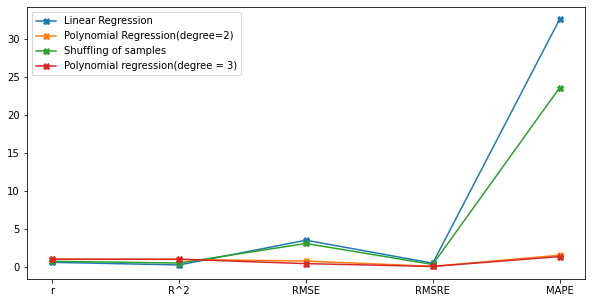

In [ ]:
x = plot.add('Polynomial regression(degree = 3)',y_test,y_pred)
plot.show(figsize=(10, 5))

**degree 3 of polynomial regression has given best results**



# **Classification metrics using any other dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("diabetes_data.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
from sklearn import preprocessing   #.apply() for single line
label_encoder = preprocessing.LabelEncoder()

data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Polyuria']= label_encoder.fit_transform(data['Polyuria'])
data['Polydipsia']= label_encoder.fit_transform(data['Polydipsia'])
data['sudden weight loss']= label_encoder.fit_transform(data['sudden weight loss'])
data['weakness']= label_encoder.fit_transform(data['weakness'])
data['Polyphagia']= label_encoder.fit_transform(data['Polyphagia'])
data['Genital thrush']= label_encoder.fit_transform(data['Genital thrush'])
data['visual blurring']= label_encoder.fit_transform(data['visual blurring'])
data['Itching']= label_encoder.fit_transform(data['Itching'])
data['Irritability']= label_encoder.fit_transform(data['Irritability'])
data['delayed healing']= label_encoder.fit_transform(data['delayed healing'])
data['partial paresis']= label_encoder.fit_transform(data['partial paresis'])
data['muscle stiffness']= label_encoder.fit_transform(data['muscle stiffness'])
data['Alopecia']= label_encoder.fit_transform(data['Alopecia'])
data['Obesity']= label_encoder.fit_transform(data['Obesity'])
data['class']= label_encoder.fit_transform(data['class'])
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
normalize=(data.iloc[:,1]-data.iloc[:,1].mean())/data.iloc[:,1].std()
#normalized_df=(df-df.mean())/df.std()
data.insert(1, 'age normalize', normalize)
data.head()

,Age,age normalize,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0.764356,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0.764356,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0.764356,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0.764356,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0.764356,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
X = data.drop(["class","Age"], axis = 1).values
y = data['class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=123)
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 76,   9],
       [  9, 114]])

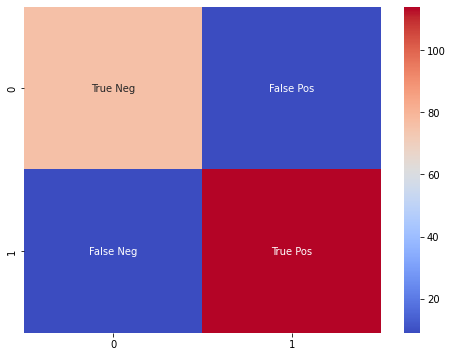

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
plt.savefig("confusion_matrix_env")
sns.heatmap(cf_matrix, annot=labels,fmt='',cmap='coolwarm')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ps = precision_score(y_test, y_pred, average=None)
print("Precision Score : ",ps)

print("------------------------------------------------")

rs = recall_score(y_test, y_pred, average=None)
print("Recall Score : ",rs)

print("------------------------------------------------")

fs = f1_score(y_test, y_pred, average=None)
print("F1 Score ",fs)

Precision Score :  [0.89411765 0.92682927]
------------------------------------------------
Recall Score :  [0.89411765 0.92682927]
------------------------------------------------
F1 Score  [0.89411765 0.92682927]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        85
           1       0.93      0.93      0.93       123

    accuracy                           0.91       208
   macro avg       0.91      0.91      0.91       208
weighted avg       0.91      0.91      0.91       208

